In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
def series_to_list(series):
    list =[]
    for s in series:
        s = re.sub("[\(\[]", "", str(s))
        s = re.sub("[\)\]]", "", str(s))
        s = re.sub("'", "", str(s))
        list = [k for k in s.split(",")]
    return list


In [3]:
df =  pd.read_csv("CandidateScore.csv")
columns = df.columns

### Histograms for each job roles

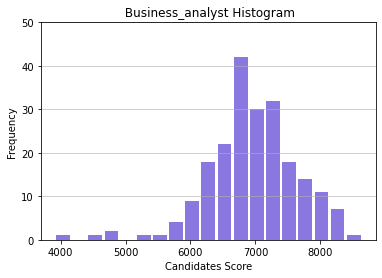

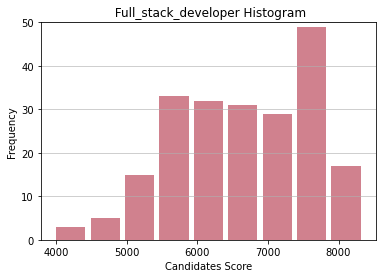

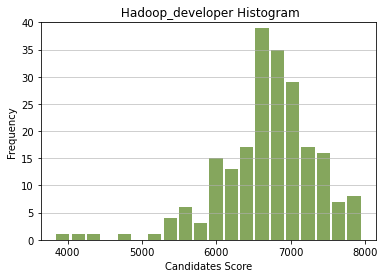

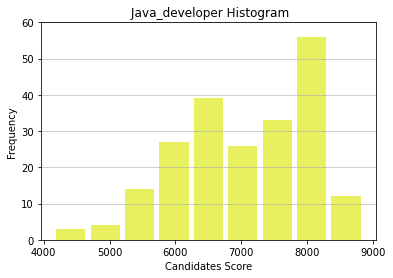

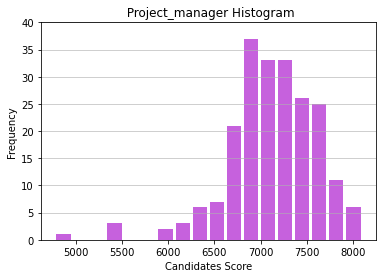

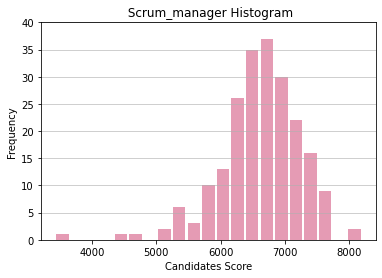

In [4]:
colour =['#593FD3','#BD4C5F','#518119','#E1EA1D','#AF1ECF', '#DA7195']
c=0
for col in columns[1:]:
    n, bins, patches = plt.hist(x=df[col]*100, bins='auto', color=colour[c],
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Candidates Score')
    plt.ylabel('Frequency')
    plt.title(f'{col} Histogram')
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()
    c+=1


### Bar graphs ###

In [11]:
sel_60 = []
sel_75 = []
for col in columns[1:]:
    score_75=0
    score_60 =0
    for i in range(len(df)):
        score = float(df.loc[[i]][col])
        if score >=60.0:
            score_60+=1
        if score >=75.0:
            score_75+=1
    sel_60.append(score_60)
    sel_75.append(score_75)

In [12]:
print(sel_75)

[42, 47, 18, 93, 45, 11]


### No. of Candidates selected in different roles (with 75% above score)


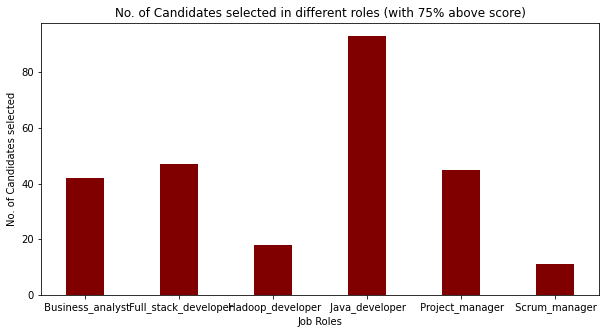

In [13]:
roles = columns[1:]
score = sel_75
fig = plt.figure(figsize=(10, 5))
# creating the bar plot
plt.bar(roles, score, color='maroon', width=0.4)
plt.xlabel("Job Roles")
plt.ylabel("No. of Candidates selected")
plt.title("No. of Candidates selected in different roles (with 75% above score)")
plt.show()

### No. of Candidates selected in different roles (with 60% above score)

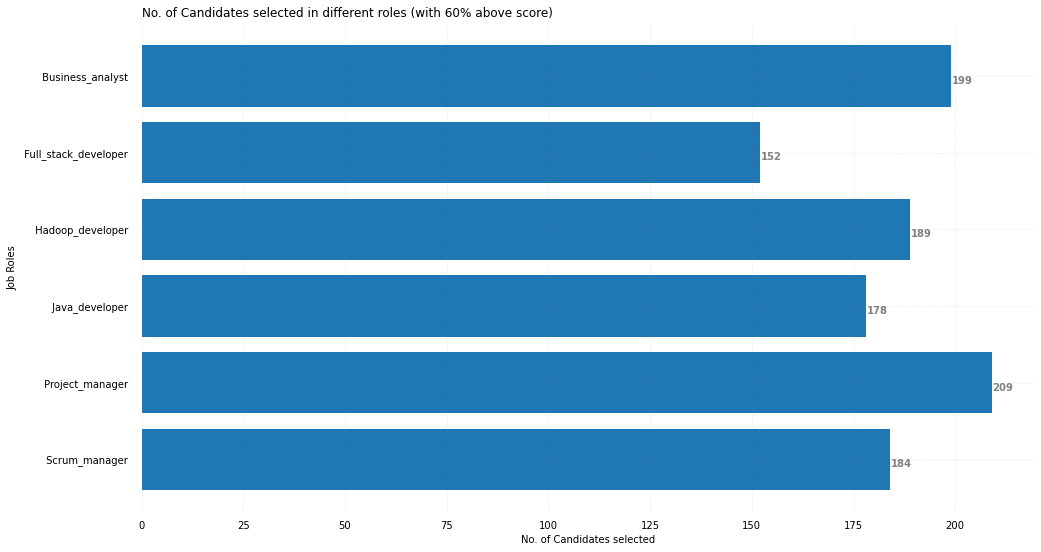

In [14]:
score = sel_60
# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))
# Horizontal Bar Plot
ax.barh(roles, score)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
plt.xlabel("No. of Candidates selected")
plt.ylabel("Job Roles")
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
# Add Plot Title
ax.set_title('No. of Candidates selected in different roles (with 60% above score)',
             loc='left', )
# Show Plot
plt.show()

0    Business_analyst
Name: JobRole, dtype: object


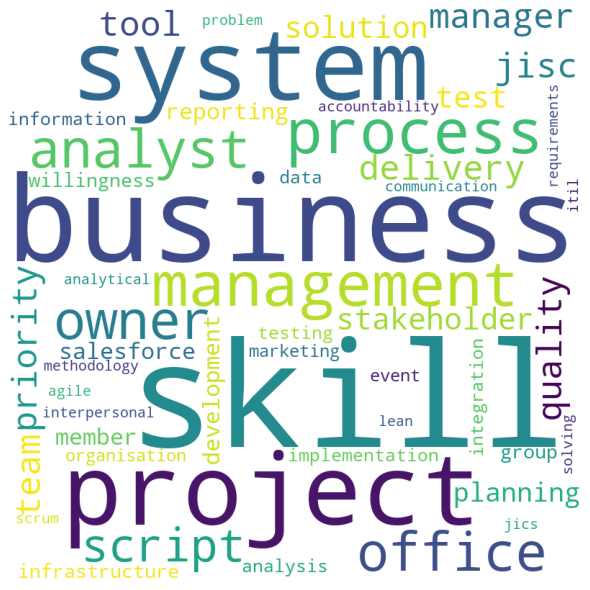

1    Full_stack_developer
Name: JobRole, dtype: object


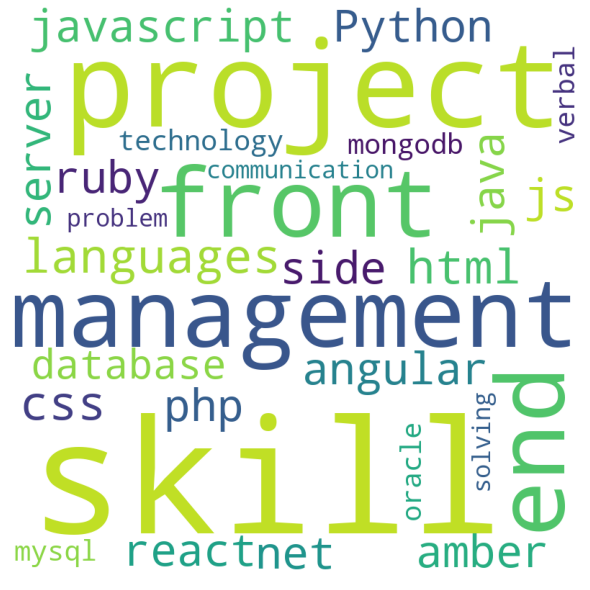

2    Hadoop_developer
Name: JobRole, dtype: object


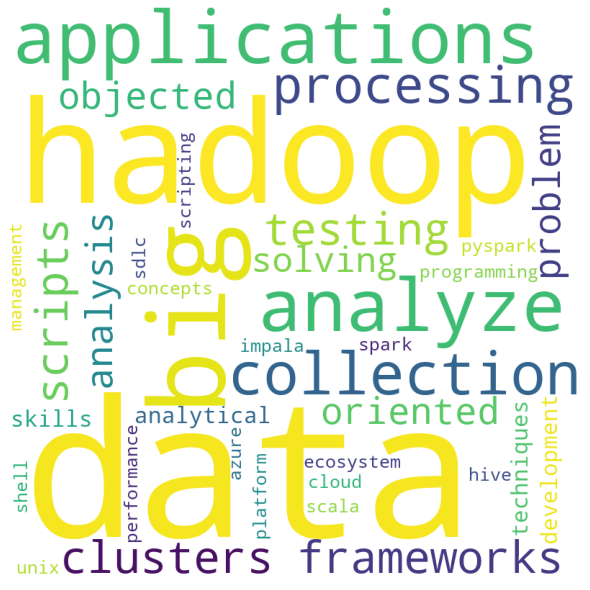

3    Java_developer
Name: JobRole, dtype: object


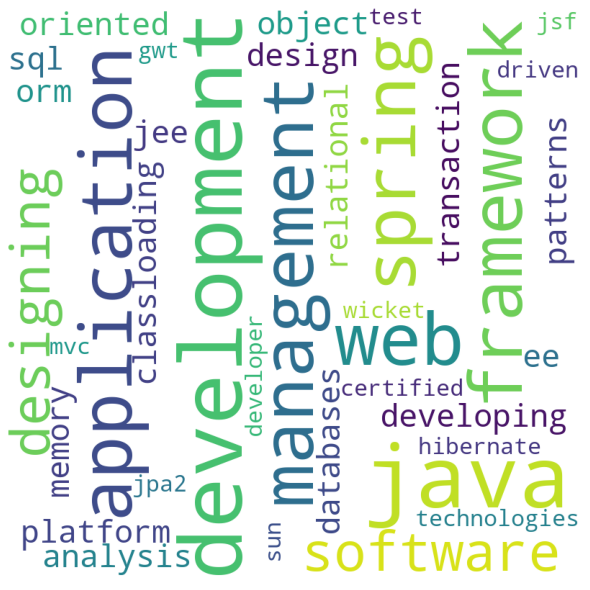

4    Project_manager
Name: JobRole, dtype: object


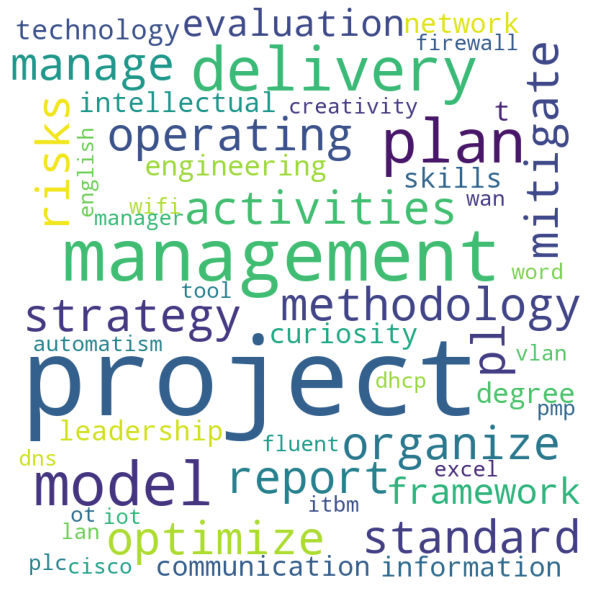

5    Scrum_manager
Name: JobRole, dtype: object


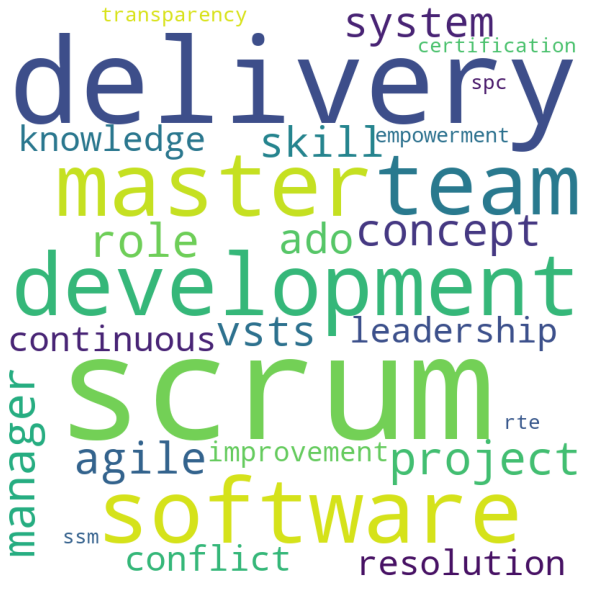

In [16]:
## word cloud
word_df = pd.read_csv('Sublist.csv')
for i in range(len(word_df)):
    sublist = series_to_list(word_df.loc[[i]]['Sublist'])
    print(word_df.loc[[i]]['JobRole'])
    comment_words = " ".join(sublist)
    wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(comment_words)
    # plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

